#### Imports

In [8]:
from typing import Dict, List, Tuple, Optional
from collections import namedtuple

In [9]:
from functional import seq, pseq
from functional.streams import Sequence
from IPython.core.display import HTML

def display_seq(sequence:Sequence,rows:int)-> None:
        sequence._repr_html_= lambda :sequence.tabulate(rows,tablefmt='html')
        display(sequence)
        sequence._repr_html_= lambda :sequence.tabulate(10,tablefmt='html')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 8]
import seaborn as sns

In [11]:
import functools
def compose(*functions):
    def compose2(f, g):
        return lambda x: f(g(x))
    return functools.reduce(compose2, functions, lambda x: x)

#  Csv Processing

In [5]:
from util import get_envs, cached_load
base_dir = get_envs()["base_dir"]

In [9]:
# coauthorships = pd.read_csv(base_dir + "/coauthorships.csv",header=None,names= ['a_key','b_key','count'])

In [6]:
import igraph as ig
# iGraph = ig.Graph.TupleList(seq(coauthorships).to_list(),weights=True,vertex_name_attr='id')

In [7]:
g  = ig.read(base_dir + "coauthorships.net",format="pajek")

In [11]:
len(g.vs)

2319227

### Local transitivity

In [12]:
trans_local = g.transitivity_local_undirected(mode="zero",weights ="weight")

In [13]:
len(trans_local) == len(g.vs)

True

In [14]:
df_trans_local = seq(list(g.vs)).map(lambda node:node['id']).zip(trans_local).to_pandas(columns= ['key','trans'])

In [15]:
def plot_trans(s:pd.Series,label:str,log:bool = True):
    plot = s.hist(bins=100)
    plot.set_xlabel(label)
    plot.set_ylabel("Node count")
    if log:
        plot.set_yscale('log')

In [16]:
list(df_trans_local.where(df_trans_local.trans > 1).dropna().key)

[]

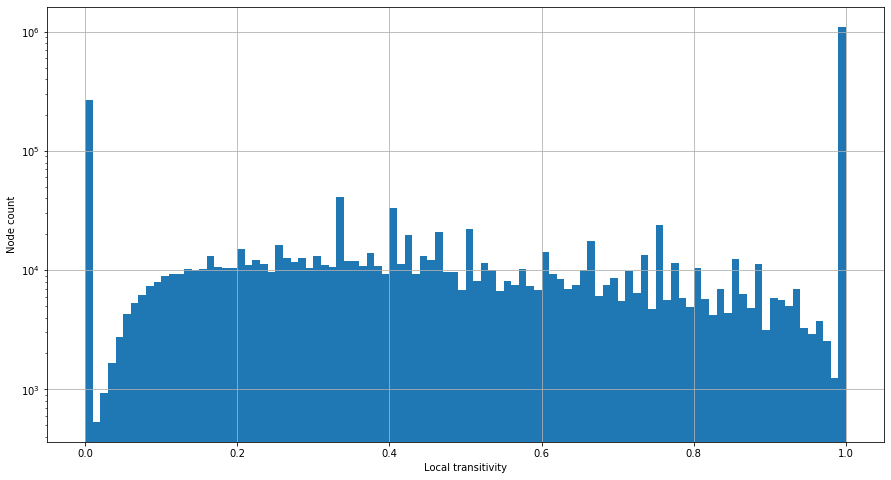

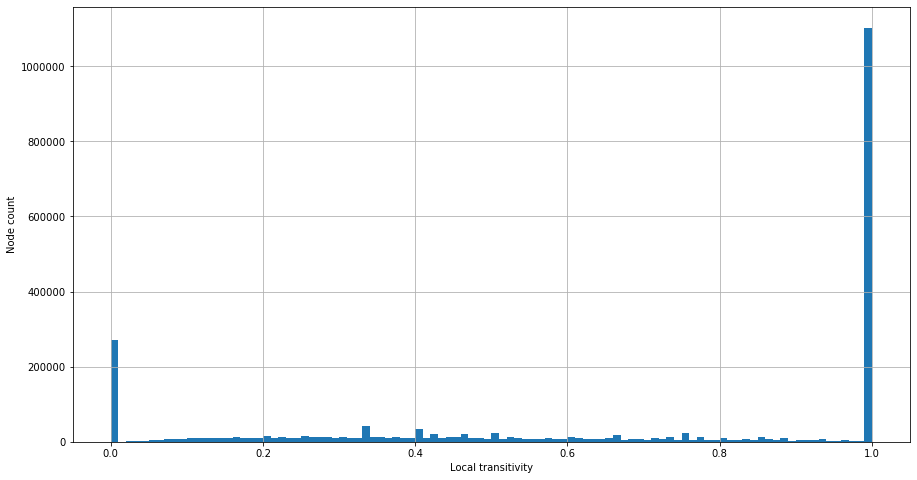

In [17]:
plot_trans(df_trans_local.trans, 'Local transitivity',log=True)
plt.show()
plot_trans(df_trans_local.trans, 'Local transitivity',log=False)

# Pagerank

In [18]:
keyset = seq(list(g.vs)).map(lambda x : x['id']).to_set()

In [38]:
"jeffrey d. ullman_pers" in keyset

True

In [19]:
pr = g.pagerank(directed=False,weights='weight')

In [20]:
df_pr= seq(list(g.vs)).map(lambda node:node['id']).zip(pr).to_pandas(columns= ['key','pr'])

In [21]:
top = df_pr.sort_values('pr',ascending=False).head(n=16)

In [23]:
persons = pd.read_csv(base_dir + "persons.csv").drop_duplicates(subset="key").dropna()
pers_dict = seq(persons).to_dict()
del persons

In [24]:
top['name'] = top.key.apply(lambda x: pers_dict[x])

In [25]:
print(top[['name','pr']].to_string(index=False))

            name        pr
        Wei Wang  0.000067
          Wei Li  0.000067
       Wei Zhang  0.000066
        Lei Wang  0.000059
       Lei Zhang  0.000056
        Yu Zhang  0.000056
        Jun Wang  0.000055
        Yang Liu  0.000054
         Jing Li  0.000054
        Xin Wang  0.000053
 H. Vincent Poor  0.000052
        Li Zhang  0.000050
       Jing Wang  0.000050
   Nadeem Javaid  0.000048
        Wei Chen  0.000048
    Nassir Navab  0.000048
